In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('california_housing_sklearn.csv')

In [4]:
df_copy = df.copy()

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
SalePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [7]:
df_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

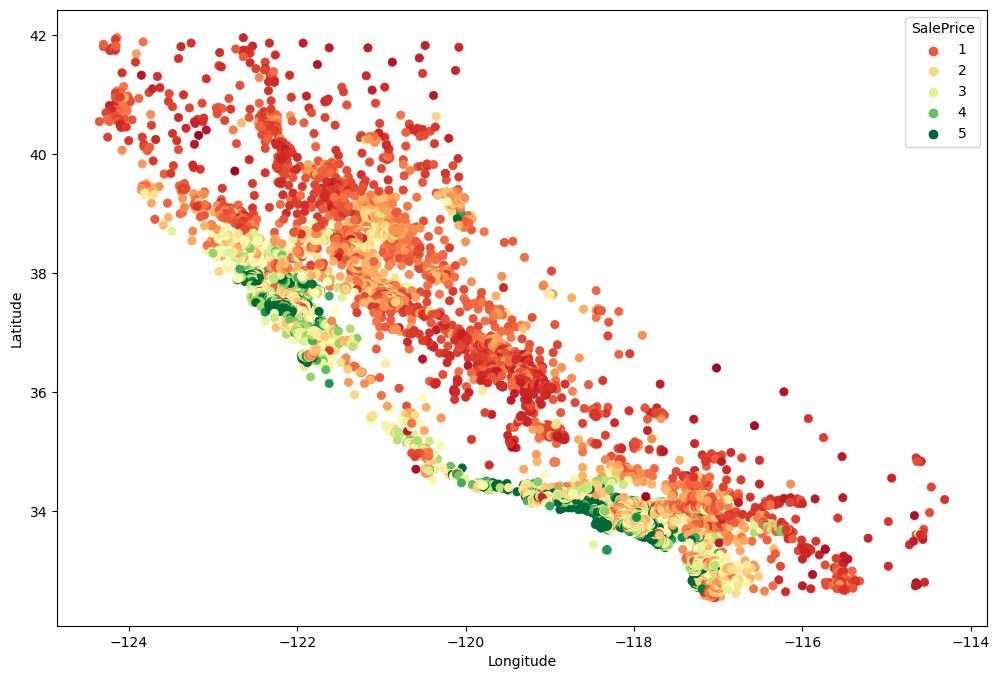

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_copy, hue = 'SalePrice',
               edgecolor = None, palette = 'RdYlGn')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_copy.drop('SalePrice', axis = 1).values
y = df_copy['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=525)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train.shape

(15480, 8)

In [15]:
#early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

model = Sequential()
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [16]:
model.fit(x = X_train,
         y = y_train,
         epochs = 500,
         batch_size = 128,
         validation_data = (X_test, y_test))

Epoch 1/500
121/121 [==============================] - 3s 6ms/step - loss: 2.0029 - val_loss: 1.0925
Epoch 2/500
121/121 [==============================] - 0s 3ms/step - loss: 1.0009 - val_loss: 0.8396
Epoch 3/500
121/121 [==============================] - 0s 3ms/step - loss: 0.8011 - val_loss: 0.7174
Epoch 4/500
121/121 [==============================] - 0s 3ms/step - loss: 0.6877 - val_loss: 0.6422
Epoch 5/500
121/121 [==============================] - 0s 3ms/step - loss: 0.6118 - val_loss: 0.5763
Epoch 6/500
121/121 [==============================] - 0s 3ms/step - loss: 0.5456 - val_loss: 0.5210
Epoch 7/500
121/121 [==============================] - 1s 4ms/step - loss: 0.4925 - val_loss: 0.4747
Epoch 8/500
121/121 [==============================] - 0s 3ms/step - loss: 0.4560 - val_loss: 0.4447
Epoch 9/500
121/121 [==============================] - 0s 3ms/step - loss: 0.4289 - val_loss: 0.4239
Epoch 10/500
121/121 [==============================] - 0s 3ms/step - loss: 0.4100 - val_lo

<Axes: >

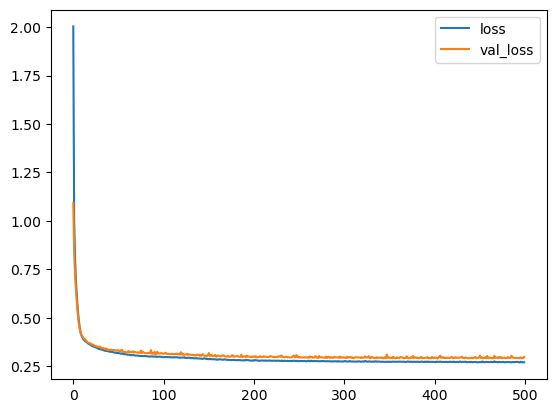

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
pred_test = pd.DataFrame(model.predict(X_test), columns = ['predicted_sale'])

162/162 [==============================] - 0s 1ms/step


In [19]:
pred_test['actual_sale'] = y_test

In [20]:
pred_test.head()

,predicted_sale,actual_sale
0,0.607357,0.629
1,0.668710,0.510
2,1.428606,1.009
3,2.363812,2.401
4,1.638144,1.286


<Axes: xlabel='actual_sale', ylabel='predicted_sale'>

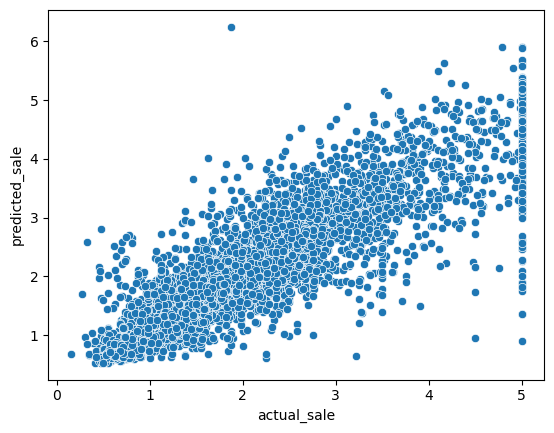

In [21]:
sns.scatterplot(x = pred_test['actual_sale'], y = pred_test['predicted_sale'])

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [23]:
mean_absolute_error(pred_test['actual_sale'], pred_test['predicted_sale'])

0.36805902608321067

In [24]:
explained_variance_score(pred_test['actual_sale'], pred_test['predicted_sale'])

0.7818016361380025

In [26]:
pd.DataFrame(mean_absolute_error(pred_test['actual_sale'], pred_test['predicted_sale'])/df_copy['SalePrice']).mean()

SalePrice    0.24511
dtype: float64